pandas(2)
-데이터 살펴보기
-누락된 값 처리하기
-데이터 분석을 위한 함수들
-간단한 시각화

#데이터 정보 살펴보기
몇개의 행만 출력하기 df.head() / df.tail()

데이터에 대한 정보 얻기 df.info()

DataFrame의 계산가능한(수치데이터 컬럼) 통계보기 df.describe()

#데이터 내용 살펴보기
Series내의 데이터 개수(빈도수) 세기 df['column'].value_count()

Series내의 unique한 값 보기 df['column'].unique()

원하는 값의 존재유무 df['column'].isin(['alpha', 'beta'])

In [3]:
!pip install pandas

In [103]:
import numpy as np
import pandas as pd

dates = pd.date_range('20180521', periods=4)
df = pd.DataFrame(np.random.randn(4, 3), index=dates, columns=list('ABC'))

print(df.head(), '\n')
print(df.tail(), '\n')
print(df.info(), '\n')
print(df.shape)

                   A         B         C
2018-05-21  0.782459  0.923872 -0.810057
2018-05-22  0.244368 -0.193028 -1.121423
2018-05-23 -1.356290 -1.306931  0.614729
2018-05-24 -1.278147  0.099316 -0.307040 

                   A         B         C
2018-05-21  0.782459  0.923872 -0.810057
2018-05-22  0.244368 -0.193028 -1.121423
2018-05-23 -1.356290 -1.306931  0.614729
2018-05-24 -1.278147  0.099316 -0.307040 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2018-05-21 to 2018-05-24
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       4 non-null      float64
dtypes: float64(3)
memory usage: 128.0 bytes
None 

(4, 3)


In [109]:
import numpy as np 
import pandas as pd
# DataFrame 정의하기(dictionary 이용)
data = {'Name': ['Lee', 'Lee', 'Choi', 'Kim', 'Park'],
'Year': [2013, 2014, 2015, 2016, 2015], 
'Points': [1.5, 1.8, 3.6, 2.4, 2.9]}

df = pd.DataFrame(data) 
print(df.describe())
print(df.tail())
print(df.shape)

              Year    Points
count     5.000000  5.000000
mean   2014.600000  2.440000
std       1.140175  0.844393
min    2013.000000  1.500000
25%    2014.000000  1.800000
50%    2015.000000  2.400000
75%    2015.000000  2.900000
max    2016.000000  3.600000
   Name  Year  Points
0   Lee  2013     1.5
1   Lee  2014     1.8
2  Choi  2015     3.6
3   Kim  2016     2.4
4  Park  2015     2.9
(5, 3)


In [8]:
import numpy as np 
import pandas as pd
# DataFrame 정의하기(dictionary 이용)
data = {'Name': ['Lee', 'Lee', 'Choi', 'Kim', 'Park'],
'Year': [2013, 2014, 2015, 2016, 2015], 
'Points': [1.5, 1.8, 3.6, 2.4, 2.9]}

df = pd.DataFrame(data)
print(df['Name'].value_counts(), '\n') # 빈도수
print(df['Year'].unique())

Name
Lee     2
Choi    1
Kim     1
Park    1
Name: count, dtype: int64 

[2013 2014 2015 2016]


In [9]:
import numpy as np 
import pandas as pd
# DataFrame 정의하기(dictionary 이용)
data = {'Name': ['Lee', 'Lee', 'Choi', 'Kim', 'Park'],
'Year': [2013, 2014, 2015, 2016, 2015], 
'Points': [1.5, 1.8, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data) 
print(df['Name'].isin(['Kim']))

0    False
1    False
2    False
3     True
4    False
Name: Name, dtype: bool


In [10]:
import numpy as np 
import pandas as pd
# DataFrame 정의하기(dictionary 이용)
data = {'Name': ['Lee', 'Lee', 'Choi', 'Kim', 'Park'],
'Year': [2013, 2014, 2015, 2016, 2015], 
'Points': [1.5, 1.8, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
print(df.loc[df['Name'].isin(['Kim', 'Lee']), :])

  Name  Year  Points
0  Lee  2013     1.5
1  Lee  2014     1.8
3  Kim  2016     2.4


In [110]:
import seaborn as sns

df = sns.load_dataset('tips') # 데이터 가져오기
df.describe() #통계데이터 볼 수 있다.
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
df['sex'].value_counts() #좋다 이함수!! 잘 사용해보자 

sex
Male      157
Female     87
Name: count, dtype: int64

#누적된 값 처리하기 

#Null 확인
df.isnull() #모든 데이터의 NaN 여부 확인(True, False)

1. Missing data dropping
null값을 제거
df.dropna(how='any') #행의 값이 하나라도 NaN인 경우에 제거
df.dropna(how='all') #행의 값이 모두 NaN인 경우에만 제거

2. Misiing data filling
null이 아닌 값으로 대체
df.fillna(value=0.05) #NaN값을 모두 0.05로 대체

In [23]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
print(df, '\n') 
print(df.isnull())

                   A         B         C    D
2020-10-21  2.022975  0.238798  0.257914  1.0
2020-10-22  0.523067 -0.575610  0.291143  NaN
2020-10-23 -0.153319  0.544597 -1.044930  3.5
2020-10-24 -0.601958 -1.075885 -0.635440  6.1
2020-10-25 -0.547268 -1.038123  0.145160  NaN
2020-10-26 -0.759721 -0.611693 -0.286152  7.0 

                A      B      C      D
2020-10-21  False  False  False  False
2020-10-22  False  False  False   True
2020-10-23  False  False  False  False
2020-10-24  False  False  False  False
2020-10-25  False  False  False   True
2020-10-26  False  False  False  False


In [24]:
import numpy as np 
import pandas as pd
dates = pd.date_range('20201021', periods=4)
df = pd.DataFrame(np.random.randn(4, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, np.nan]
print(df, '\n')
print(df.dropna(how='any'))

                   A         B         C    D
2020-10-21  0.266852 -0.308568 -0.412947  1.0
2020-10-22 -0.568779 -2.542322  0.575302  NaN
2020-10-23 -0.387884  0.165717  1.121169  3.5
2020-10-24  1.093006 -0.816249 -0.260889  NaN 

                   A         B         C    D
2020-10-21  0.266852 -0.308568 -0.412947  1.0
2020-10-23 -0.387884  0.165717  1.121169  3.5


In [28]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=4)
df = pd.DataFrame(np.random.randn(4, 3), index=dates, columns=list('ABC')) 
df['D'] = [np.nan, np.nan, 3.5, np.nan]
print(df, '\n')
print(df.dropna(how='all'))

                   A         B         C    D
2020-10-21  0.546565  0.948612 -1.398810  NaN
2020-10-22  1.505603 -2.214733  0.248142  NaN
2020-10-23  0.032847  0.490697  3.141407  3.5
2020-10-24  0.989680  0.159117 -0.032741  NaN 

                   A         B         C    D
2020-10-21  0.546565  0.948612 -1.398810  NaN
2020-10-22  1.505603 -2.214733  0.248142  NaN
2020-10-23  0.032847  0.490697  3.141407  3.5
2020-10-24  0.989680  0.159117 -0.032741  NaN


In [29]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=4)
df = pd.DataFrame(np.random.randn(4, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, np.nan]
print(df, '\n')
print(df.fillna(value=0.05))

                   A         B         C    D
2020-10-21  0.872040 -0.901876 -0.136268  1.0
2020-10-22  0.070427 -1.303394  0.732455  NaN
2020-10-23  1.589674 -0.459700 -1.061648  3.5
2020-10-24 -0.640207  0.910887  0.811428  NaN 

                   A         B         C     D
2020-10-21  0.872040 -0.901876 -0.136268  1.00
2020-10-22  0.070427 -1.303394  0.732455  0.05
2020-10-23  1.589674 -0.459700 -1.061648  3.50
2020-10-24 -0.640207  0.910887  0.811428  0.05


#데이터분석을 위한 함수들 

1. Summarize Data
▪   len(df) -> 항목개수 
▪   sum(), count()
▪   median(), min(), max(), mean(), var(), std(), corr(), cov()

2. Reshape Data
▪ pd.concat([df1,df2], axes=0)
▪ pd.merge(df_left, df_right, left_on=None, right_on=None, on=None, 
how='inner')
▪ df.pivot_table(index=‘var’, columns=‘var’, values=‘var’,
aggfunc=‘func’)
▪ df.sort_values(‘mpg’, ascending=False)
▪ df.rename(columns={‘y’:‘year’})
▪ df.drop()  df.drop_duplicates(inplace=True)

3. Group Data
▪ df.groupby(by=“col”) -> 특정 컬렁 그룹화

In [32]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
print(df, '\n')
print(f"#rows = {len(df)}, #rows = {df.shape[0]}, #cols = {df.shape[1]}")

                   A         B         C    D
2020-10-21  0.906234  1.738061  0.060544  1.0
2020-10-22  0.327676  0.604124  0.036001  NaN
2020-10-23  1.591111 -0.294770  0.332563  3.5
2020-10-24  0.330612 -0.040837 -0.513843  6.1
2020-10-25 -0.558449 -1.871425 -0.584795  NaN
2020-10-26  0.104630 -0.241396  0.545281  7.0 

#rows = 6, #rows = 6, #cols = 4


In [115]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
print(df, '\n') 
print(df.sum(axis=0), '\n')
print(df.sum(axis=1), '\n')

                   A         B         C    D
2020-10-21  0.124218  1.206254 -2.289006  1.0
2020-10-22 -1.695598  0.406381 -0.837086  NaN
2020-10-23  1.055157  0.438844 -0.410489  3.5
2020-10-24  1.126536 -0.114382  1.643762  6.1
2020-10-25 -0.524113  1.233980  0.495490  NaN
2020-10-26 -0.731118 -0.834649  1.148970  7.0 

A    -0.644919
B     2.336426
C    -0.248359
D    17.600000
dtype: float64 

2020-10-21    0.041466
2020-10-22   -2.126304
2020-10-23    4.583511
2020-10-24    8.755915
2020-10-25    1.205356
2020-10-26    6.583203
Freq: D, dtype: float64 



In [37]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
print(df, '\n') 
print(df.count()) #유효한 데이터의 개수가 몇개인가? nan데이터 미포함 

                   A         B         C    D
2020-10-21  0.663203 -0.203772 -0.056381  1.0
2020-10-22 -0.024698 -0.760183  0.560080  NaN
2020-10-23  0.592371  0.408966  1.760440  3.5
2020-10-24  0.282460 -3.257064  0.341558  6.1
2020-10-25 -0.062256  0.732368  0.435484  NaN
2020-10-26  0.899989  0.130993 -0.561149  7.0 

A    6
B    6
C    6
D    4
dtype: int64


In [38]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [40]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021',
periods=6)
df = pd.DataFrame(
np.random.randn(6, 3), 
index=dates,
columns=list('ABC'))
df['D'] = [1.0, np.nan, 3.5,
6.1, np.nan, 7.0]
print(df, '\n') 
print(df.median(axis=1)) #중앙값

                   A         B         C    D
2020-10-21 -1.065783  0.161075 -1.016217  1.0
2020-10-22 -0.097998 -0.159506  1.717254  NaN
2020-10-23  0.369672  0.208903 -0.110634  3.5
2020-10-24 -0.123542  1.033510  0.090737  6.1
2020-10-25 -0.148100 -0.334694 -0.982958  NaN
2020-10-26  0.805212  1.184232  0.517126  7.0 

2020-10-21   -0.427571
2020-10-22   -0.097998
2020-10-23    0.289288
2020-10-24    0.562123
2020-10-25   -0.334694
2020-10-26    0.994722
Freq: D, dtype: float64


In [41]:
import numpy as np 
import pandas as pd
dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]

print(f"mean = {df['A'].mean()}") #평균값
print(f"std = {df['A'].std()}") #표준편차
print(f"correlation = {df['A'].corr(df['B'])}") #상관관계
print(f"covariance = {df['B'].cov(df['C'])}") #공분산

mean = -0.5914791425870837
std = 1.0873667089921577
correlation = -0.5890733037618299
covariance = -0.023621014560722617


In [42]:
import numpy as np
import pandas as pd

s1 = pd.Series(['a', 'b']) 
s2 = pd.Series(['c', 'd']) 
df = pd.concat([s1, s2]) #두 시리즈의 병합 - 단순히 연결하면 옆이 아니라 아래로 병합됨
print(df)

0    a
1    b
0    c
1    d
dtype: object


In [45]:
import numpy as np 
import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=list('AB'))  #axis는 결합방향임 = 0 or = 1
df2 = pd.DataFrame([['a', 1], ['b', 2]], columns=list('AB')) 
df3 = pd.concat([df1, df2], ignore_index=True) #ignore_index가 true 라면 원래 순서를 무시하고 이어서 작성
print(df3)

   A  B
0  a  1
1  b  2
2  a  1
3  b  2


In [46]:
import numpy as np 
import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=list('AB')) 
df2 = pd.DataFrame([['a', 1], ['b', 2]], columns=list('AB')) 
df3 = pd.concat([df1, df2], axis=1)
print(df3)

   A  B  A  B
0  a  1  a  1
1  b  2  b  2


In [47]:
import numpy as np 
import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2], ['c', 3]], index=[0, 1, 2],
columns=list('AB'))
df2 = pd.DataFrame([['a', 1], ['b', 2], ['c', 3]], index=[1, 2, 3], 
columns=list('AB'))
df3 = pd.concat([df1, df2], axis=1) # outer join 중복되는 부분을 제외한 부분을 보여줌
print(df3)

     A    B    A    B
0    a  1.0  NaN  NaN
1    b  2.0    a  1.0
2    c  3.0    b  2.0
3  NaN  NaN    c  3.0


In [52]:
import numpy as np 
import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2], ['c', 3]], index=[0, 1, 2], 
columns=list('AB'))
df2 = pd.DataFrame([['a', 1], ['b', 2], ['c', 3]], index=[1, 2, 3], 
columns=list('AB'))
df3 = pd.concat([df1, df2], axis=1, join='inner')  #중복되는 부분만 보여줌
df3

,A,B,A,B
1,b,2,a,1
2,c,3,b,2


# pd.merge(df_left, df_right, left_on=None, right_on=None, on=None, how='inner')

▪  두    DataFrame을    각    데이터에    존재하는    고유값(key)을    기준으로    조인

• join 방식    : inner, left, right, outer

• 고유값(key) 컬럼이    같을    때,
− pd.merge(df_left, df_right, on='key', how='join_method')

• 고유값(key) 컬럼이    다를    때,
− pd.merge(df_left, df_right, left_on='lkey', right_on='rkey', how='join_method')

In [49]:
import pandas as pd

df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]}) 
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
df3 = pd.merge(df1, df2, how='inner', on='a') 
df3

,a,b,c
0,foo,1,3


In [50]:
import pandas as pd

df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]}) 
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
df3 = pd.merge(df1, df2, how='left', left_on='a', right_on='a') #left join
df3

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [51]:
import pandas as pd

df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]}) 
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
df3 = pd.merge(df1, df2, how='right', on='a')  #right join
df3

,a,b,c
0,foo,1.0,3
1,baz,NaN,4


In [ ]:
import pandas as pd

df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]}) 
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
df3 = pd.merge(df1, df2, how='outer', on='a')   # OUTER JOIN
df3

#데이터를 완전히 재구조 할 때 사용한다 pivot

In [63]:
import numpy as np 
import pandas as pd

df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
'bar': ['A', 'B', 'C', 'A', 'B', 'C'], 
'baz': [1, 2, 3, 4, 5, 6],
'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
#print(df, '\n')
print(df.pivot(index='foo', columns='bar', values='zoo'))

bar  A  B  C
foo         
one  x  y  z
two  q  w  t


1. df.pivot_table(index=‘var’, columns=‘var’, values=‘var’, aggfunc=‘func’)

In [66]:
import pandas as pd 
import seaborn as sns

df = sns.load_dataset('titanic')
df = df[['age', 'sex', 'class', 'fare', 'survived']]
df1 = pd.pivot_table(df,             # 피벗할 데이터프레임
                     index= 'class', # 행 위치에 들어갈 열
                     columns='sex',  # 열 위치에 들어갈 열
                     values='age',   # 데이터로 사용할 열
                     aggfunc='mean') # 데이터 집계함수
df1

C:\Users\김경민\AppData\Local\Temp\ipykernel_20584\259563159.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df1 = pd.pivot_table(df,


sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [67]:
df2 = pd.pivot_table(df, index= 'class', columns= 'sex', values= 'survived', aggfunc= ['mean', 'sum'])

df2

'''
3등석(Third)에   탄   여자(female)들의   생존여부 
(survived)는    평균    50%정도,
1등석(First)에    탄    남자(male)들의    생존자는    모두 
45명
'''

C:\Users\김경민\AppData\Local\Temp\ipykernel_20584\155610392.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = pd.pivot_table(df, index= 'class', columns= 'sex', values= 'survived', aggfunc= ['mean', 'sum'])
C:\Users\김경민\AppData\Local\Temp\ipykernel_20584\155610392.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = pd.pivot_table(df, index= 'class', columns= 'sex', values= 'survived', aggfunc= ['mean', 'sum'])


mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [68]:
df3 = pd.pivot_table(df, index = ['class','sex'], columns = 'survived',
values = ['age','fare'], aggfunc = ['mean','max'])

df3

C:\Users\김경민\AppData\Local\Temp\ipykernel_20584\3795378673.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df3 = pd.pivot_table(df, index = ['class','sex'], columns = 'survived',
C:\Users\김경민\AppData\Local\Temp\ipykernel_20584\3795378673.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df3 = pd.pivot_table(df, index = ['class','sex'], columns = 'survived',


mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [70]:
import numpy as np 
import pandas as pd 

df = pd.DataFrame({
'col1': ['A', 'A', 'B', np.nan, 'D', 'C'], 
'col2': [2, 1, 9, 8, 7, 4],
'col3': [0, 1, 9, 4, 2, 3],
'col4': ['a', 'b', 'c', 'd', 'e', 'f']}) 
print(df, '\n')
print(df.sort_values(by=['col2'])) 

  col1  col2  col3 col4
0    A     2     0    a
1    A     1     1    b
2    B     9     9    c
3  NaN     8     4    d
4    D     7     2    e
5    C     4     3    f 

  col1  col2  col3 col4
1    A     1     1    b
0    A     2     0    a
5    C     4     3    f
4    D     7     2    e
3  NaN     8     4    d
2    B     9     9    c


In [80]:
import numpy as np 
import pandas as pd 

df = pd.DataFrame({
'col1': ['A', 'A', 'B', np.nan, 'D', 'C'], 
'col2': [2, 1, 9, 8, 7, 4],
'col3': [0, 1, 9, 4, 2, 3],
'col4': ['a', 'b', 'c', 'd', 'e', 'f']}) 
print(df, '\n')
print(df.sort_values(by='col1', ascending=False)) #ascending = False -> 내림차순

  col1  col2  col3 col4
0    A     2     0    a
1    A     1     1    b
2    B     9     9    c
3  NaN     8     4    d
4    D     7     2    e
5    C     4     3    f 

  col1  col2  col3 col4
4    D     7     2    e
5    C     4     3    f
2    B     9     9    c
0    A     2     0    a
1    A     1     1    b
3  NaN     8     4    d


In [75]:
import numpy as np 
import pandas as pd 

df = pd.DataFrame({
'col1': ['A', 'A', 'B', np.nan, 'D', 'C'], 
'col2': [2, 1, 9, 8, 7, 4],
'col3': [0, 1, 9, 4, 2, 3],
'col4': ['a', 'b', 'c', 'd', 'e', 'f']}) 
print(df, '\n')
print(df.sort_values(by=['col1', 'col2']))

  col1  col2  col3 col4
0    A     2     0    a
1    A     1     1    b
2    B     9     9    c
3  NaN     8     4    d
4    D     7     2    e
5    C     4     3    f 

  col1  col2  col3 col4
1    A     1     1    b
0    A     2     0    a
2    B     9     9    c
5    C     4     3    f
4    D     7     2    e
3  NaN     8     4    d


In [77]:
import numpy as np 
import pandas as pd

df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]}) 
print(df, '\n')
df.rename(index={0: "x", 1: "y", 2: "z"}, inplace=True) 
# df.rename(columns={‘y’:‘year’}, index={‘0’:‘x’}) 컬럼 이름바꾸기

print(df)

   A  B
0  1  4
1  2  5
2  3  6 

   A  B
x  1  4
y  2  5
z  3  6


In [81]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
print(df, '\n')
df.drop(pd.to_datetime('20201023'), inplace=True) 
print(df)

                   A         B         C    D
2020-10-21 -0.070236  0.115124 -0.310907  1.0
2020-10-22 -0.706007 -0.026168 -0.223209  NaN
2020-10-23  0.562724 -1.419923  0.349848  3.5
2020-10-24  0.203711 -0.205709 -0.051251  6.1
2020-10-25 -0.345892  0.003328  1.527846  NaN
2020-10-26 -1.619580 -0.937782 -0.608861  7.0 

                   A         B         C    D
2020-10-21 -0.070236  0.115124 -0.310907  1.0
2020-10-22 -0.706007 -0.026168 -0.223209  NaN
2020-10-24  0.203711 -0.205709 -0.051251  6.1
2020-10-25 -0.345892  0.003328  1.527846  NaN
2020-10-26 -1.619580 -0.937782 -0.608861  7.0


In [82]:
import numpy as np 
import pandas as pd

dates = pd.date_range('20201021', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC')) 
df['D'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
df.drop([pd.to_datetime('20201023'), pd.to_datetime('20201024')], inplace=True) 
print(df)

                   A         B         C    D
2020-10-21 -1.031193  0.839451 -0.793486  1.0
2020-10-22  2.288662 -1.502979  0.505296  NaN
2020-10-25  0.310773 -2.648470  1.311004  NaN
2020-10-26  1.815405  0.257515  0.645841  7.0


In [87]:
!pip install pandas
!pip install numpy

In [89]:
import numpy as np
import pandas as pd

data = {
    'Name': ['Lee', 'kim', 'Lee', 'Kim', 'Kim'],
    'Year': [2013, 2013, 2015, 2015, 2015], 
    'Points': [1.5, 1.8, 3.6, 2.4, 2.9]
}
df = pd.DataFrame(data) 
print(df, '\n')

# Group by 'Year' and calculate the mean for numeric columns
print(df.groupby('Year').mean(numeric_only=True))


  Name  Year  Points
0  Lee  2013     1.5
1  kim  2013     1.8
2  Lee  2015     3.6
3  Kim  2015     2.4
4  Kim  2015     2.9 

        Points
Year          
2013  1.650000
2015  2.966667


In [85]:
import numpy as np 
import pandas as pd

data = {'Name': ['Lee', 'Kim', 'Lee', 'Kim', 'Kim'],
'Year': [2013, 2013, 2015, 2015, 2015], 
'Points': [1.5, 1.8, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data) 
print(df, '\n')
print(df.groupby(['Name', 'Year']).mean())

  Name  Year  Points
0  Lee  2013     1.5
1  Kim  2013     1.8
2  Lee  2015     3.6
3  Kim  2015     2.4
4  Kim  2015     2.9 

           Points
Name Year        
Kim  2013    1.80
     2015    2.65
Lee  2013    1.50
     2015    3.60


4. 간단한 시각화 

• data : Series or DataFrame
• x : label or position(only DataFrame)
• y : label or position(only DataFrame)
• kind : {line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin}
• title : str
• grid : bool(default: None)
• legend : bool
• xticks, yticks : sequence
• xlebel, ylabel : str

▪   참고    사이트
• https://pandas.pydata.org/docs/user_guide/visualization.html#

➢     자유로운    plotting을    위해    보통    matplotlib 또는    seaborn을    사용하는    것 
이    바람직하다고    함

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: title={'center': 'Total Bill vs Tip'}, xlabel='total_bill', ylabel='tip'>

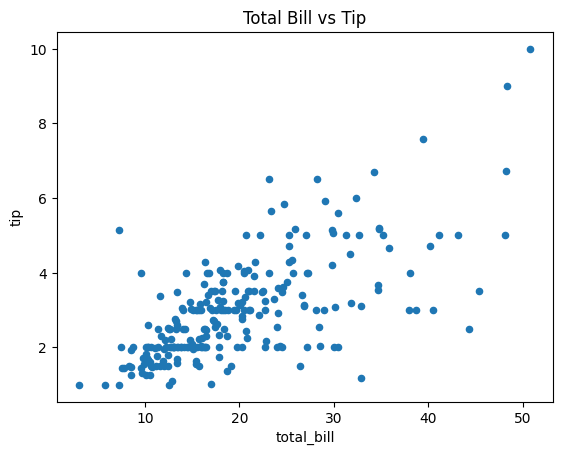

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = sns.load_dataset('tips') 
df = pd.DataFrame(data) 
print(df)
df.plot(kind='scatter', x='total_bill', y='tip', title='Total Bill vs Tip')

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: title={'center': 'Total Bill'}, ylabel='Frequency'>

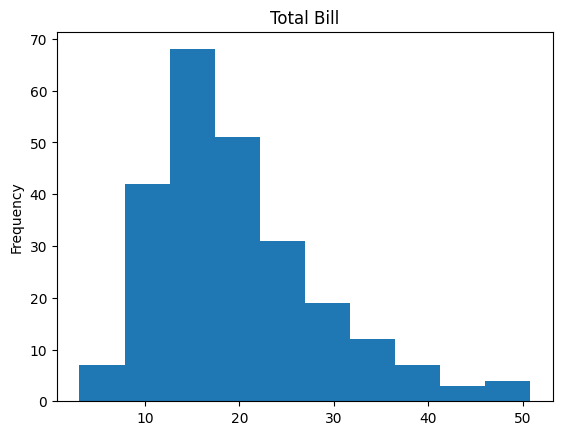

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = sns.load_dataset('tips') 
df = pd.DataFrame(data) 
print(df)
df['total_bill'].plot(kind='hist', title='Total Bill')

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: title={'center': 'Total Bill'}>

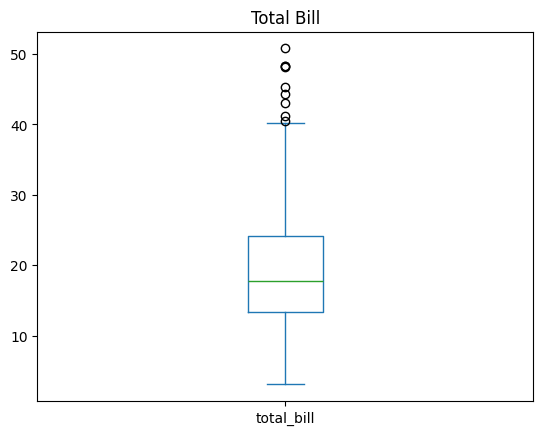

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = sns.load_dataset('tips') 
df = pd.DataFrame(data) 
print(df)
df['total_bill'].plot(kind='box', title='Total Bill')

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

<Axes: title={'center': 'Dist. of Ages'}, ylabel='Density'>

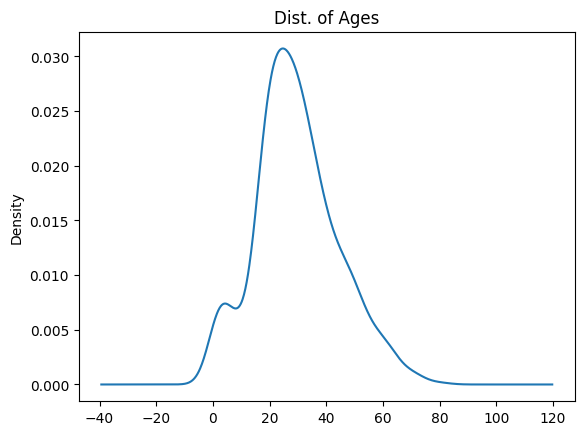

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = sns.load_dataset('titanic') 
df = pd.DataFrame(data)
print(df)
df['age'].plot(kind='kde', title='Dist. of Ages')

참고사이트

❖  공공데이터    포털
▪  https://www.data.go.kr/index.do
❖  기상청    기상자료개방    포털
▪  https://data.kma.go.kr/cmmn/main.do
❖  Pandas를    이용한    데이터    분석    기초
▪  https://wikidocs.net/2873
❖  Pandas Tutorials
▪  http://pandas.pydata.org/pandas-docs/stable/tutorials.html
❖  Pandas documentation
▪  https://pandas.pydata.org/docs/index.html

In [102]:
import pandas as pd

df = pd.read_csv('c:\Temp\병원DATA.csv')
df.dropna()

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\김경민\AppData\Local\Temp\ipykernel_20584\880168663.py:3: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('c:\Temp\병원DATA.csv')


,Unnamed: 0,city,gu_address,dong_address,post_code,address,tel,homepage,subject
0,강북삼성병원,서울,종로구,평동,3181,"서울특별시 종로구 새문안로 29, (평동)",02-2001-2001,http://www.kbsmc.co.kr,"가정의학과, 구강악안면외과, 내과, 마취통증의학과, 방사선종양학과, 병리과, 비뇨의..."
1,건국대학교병원,서울,광진구,화양동,5030,"서울특별시 광진구 능동로 120-1, (화양동)",1588-1533,http://www.kuh.ac.kr,"가정의학과, 구강악안면외과, 내과, 마취통증의학과, 방사선종양학과, 병리과, 비뇨의..."
2,경희대학교병원,서울,동대문구,회기동,2447,"서울특별시 동대문구 경희대로 23, (회기동)",02-958-8114,http://www.khuh.or.kr/,"가정의학과, 구강악안면외과, 내과, 마취통증의학과, 방사선종양학과, 병리과, 비뇨의..."
3,고려대학교의과대학부속구로병원,서울,구로구,구로동,8308,"서울특별시 구로구 구로동로 148, 고려대부속구로병원 (구로동)",02-2626-1114,http://guro.kumc.or.kr/main/index.do,"가정의학과, 구강악안면외과, 내과, 마취통증의학과, 방사선종양학과, 병리과, 비뇨의..."
4,삼성서울병원,서울,강남구,일원동,6351,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)",02-3410-2114,http://www.samsunghospital.com,"가정의학과, 구강악안면외과, 내과, 마취통증의학과, 방사선종양학과, 병리과, 비뇨의..."
...,...,...,...,...,...,...,...,...,...
18915,후후한의원,서울,서초구,잠원동,6512,"서울특별시 서초구 신반포로 213, 7동 509~512호 (잠원동, 반포쇼핑타운)",02-533-0099,http://www.siwonhan.com,"사상체질과, 침구과, 한방내과, 한방부인과, 한방소아과, 한방신경정신과, 한방안·이..."
18919,휴본한의원,서울,중구,무교동,4520,"서울특별시 중구 무교로 15, 7층 (무교동)",02-757-7585,http://www.hubonclinic.com,"사상체질과, 침구과, 한방내과, 한방부인과, 한방소아과, 한방신경정신과, 한방안·이..."
18920,휴한의원,서울,노원구,상계동,1695,"서울특별시 노원구 노해로83길 4, 4층 (상계동, 은애경빌딩)",02-934-9690,http://,"사상체질과, 침구과, 한방내과, 한방부인과, 한방소아과, 한방신경정신과, 한방안·이..."
18921,휴한의원,서울,강남구,역삼동,6143,"서울특별시 강남구 봉은사로 310, 숨빌딩 8층 (역삼동)",02-552-3710,http://www.hyooclinic.com/,"사상체질과, 침구과, 한방내과, 한방부인과, 한방소아과, 한방신경정신과, 한방안·이..."
